In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [99]:
import pandas as pd
from testmining import folders
import os

os.environ['PRIO_QUALIFIER'] = 'experimental'

frames = []
for project_name, project_path in folders.projects():
    df = pd.read_csv(folders.apfd(project_path))[['untreated']].reset_index()
    df['untreated'] = df['untreated'] * 100
    df['trend'] = df['untreated'].rolling(50, min_periods=1).mean()
    df['project'] = project_name.split('@')[1]
    frames.append(df)
df = pd.concat(frames)

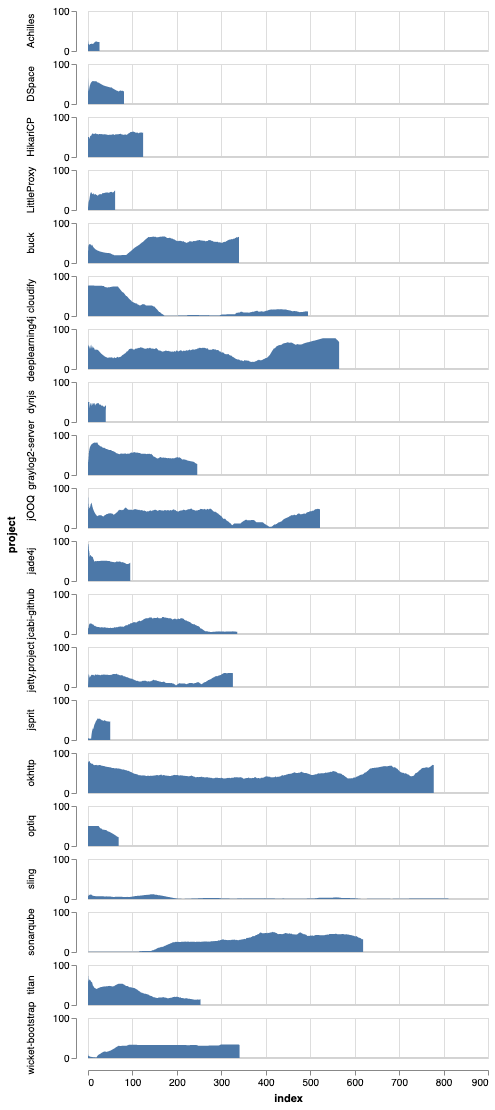

In [100]:
import altair as alt

df['const'] = .5

(alt.Chart().mark_rule(color='lightgray').encode(y='const')+ alt.Chart().mark_area().encode(
    x=alt.X('index'),
    y=alt.Y('trend', title=''),
)).properties(data=df, height=40).facet('project:N').configure_header(labelAngle=0)


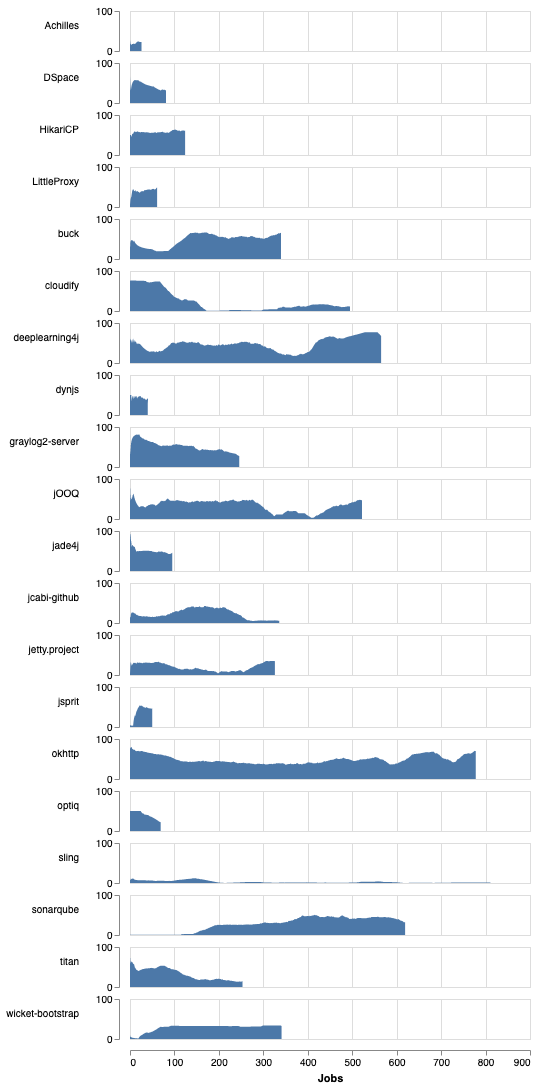

In [101]:
alt.Chart(df).mark_area().encode(
    x=alt.X('index', title='Jobs'),
    y=alt.Y('trend', title=''),
    row=alt.Row('project:N', header=alt.Header(labelAngle=0, title='')),
).properties(height=40)